In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Now you can read the file with the correct path
train_path = '/content/drive/My Drive/train.csv'
test_path = '/content/drive/My Drive/test.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
print("Training Data Head:\n", train_data.head())

Training Data Head:
    ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0   

In [ ]:
# Step 3: Data Cleaning
# Remove duplicates
train_data = train_data.drop_duplicates()

# Replace ambiguous entries ('?') with NaN
train_data.replace('?', pd.NA, inplace=True)

# Handle missing values
categorical_cols = train_data.select_dtypes(include='object').columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
for col in numerical_cols:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

print("Missing values handled.\n")

Missing values handled.



<ipython-input-3-524cd6fc96de>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
<ipython-input-3-524cd6fc96de>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
# Step 4: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])

In [ ]:
# Step 5: Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = train_data.drop(['ID', 'Class/ASD'], axis=1)
y = train_data['Class/ASD']

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=16)
X_selected = selector.fit_transform(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<ipython-input-12-b79777c2fcef>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Score', data=feature_df, palette='pastel')


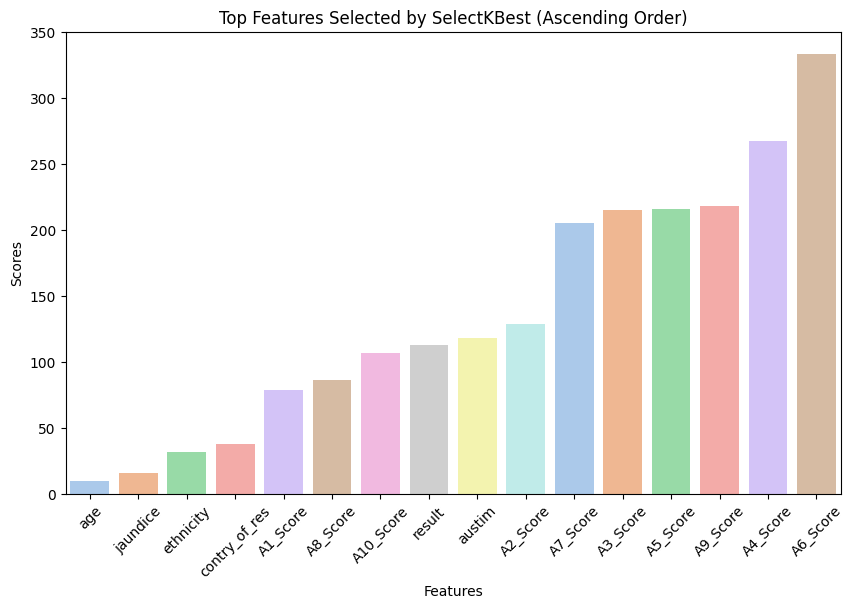

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature scores and selected features
feature_scores = selector.scores_[selector.get_support()]
selected_features = X.columns[selector.get_support()]

# Create a DataFrame for sorting
feature_df = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})

# Sort by scores in ascending order
feature_df = feature_df.sort_values(by='Score', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Score', data=feature_df, palette='pastel')
plt.title("Top Features Selected by SelectKBest (Ascending Order)")
plt.xlabel("Features")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-2059398031a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Class/ASD', y='age', data=train_data, palette='pastel', alpha=0.7)


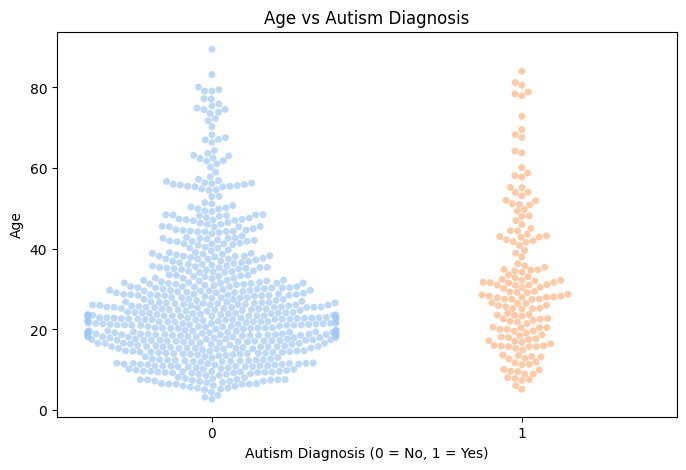

In [ ]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='Class/ASD', y='age', data=train_data, palette='pastel', alpha=0.7)
plt.title("Age vs Autism Diagnosis")
plt.xlabel("Autism Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

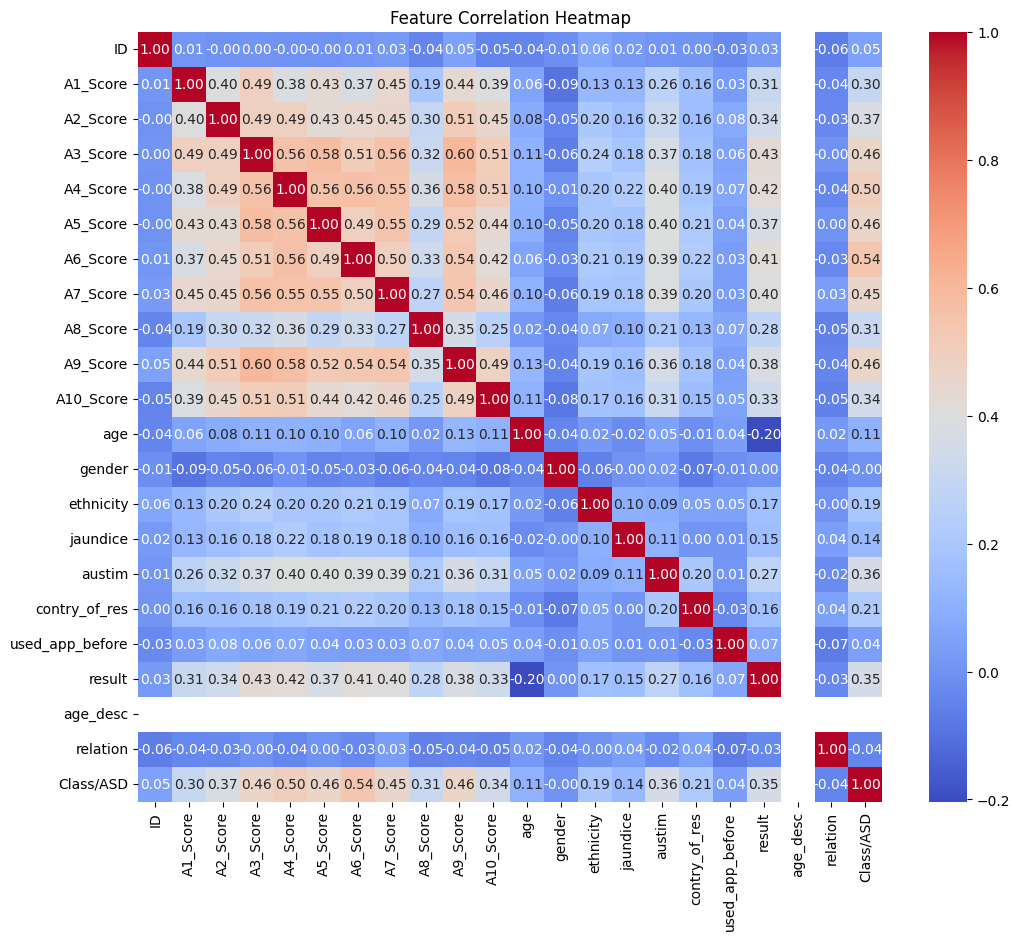

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

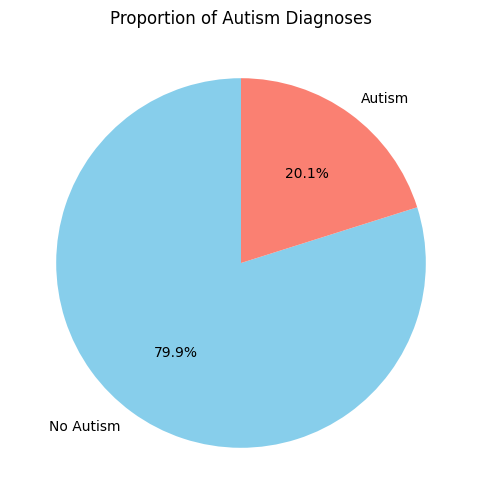

In [ ]:
plt.figure(figsize=(6, 6))
labels = train_data['Class/ASD'].value_counts().index
sizes = train_data['Class/ASD'].value_counts().values
plt.pie(sizes, labels=["No Autism", "Autism"], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title("Proportion of Autism Diagnoses")
plt.show()

<ipython-input-15-5bf19b825e60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=train_data, palette='Set2')


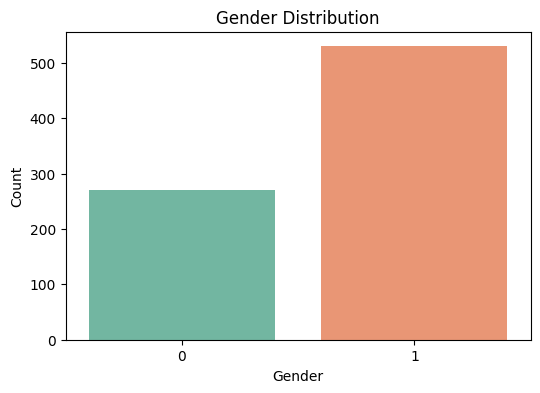

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=train_data, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=36)

In [ ]:
# Step 7: BAM Model Implementation
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Define the BAM model
class BAM:
    def __init__(self, input_dim, output_dim):
        self.weight_matrix = np.zeros((input_dim, output_dim))

    def train(self, X, Y):
        for x, y in zip(X, Y):
            self.weight_matrix += np.outer(x, y)

    def predict(self, X):
        predictions = []
        for x in X:
            y = np.dot(x, self.weight_matrix)
            predictions.append(np.sign(y))
        return np.array(predictions)

# Prepare BAM training data
X_train_bam = np.array([np.where(x > 0, 1, -1) for x in X_train])
y_train_bam = np.array([np.where(y > 0, 1, -1) for y in y_train]).reshape(-1, 1)

# Initialize and train the BAM model
bam = BAM(X_train_bam.shape[1], y_train_bam.shape[1])
bam.train(X_train_bam, y_train_bam)

# Make predictions
X_test_bam = np.array([np.where(x > 0, 1, -1) for x in X_test])
y_pred_bam = bam.predict(X_test_bam)
y_pred_final = np.where(y_pred_bam > 0, 1, 0)

In [ ]:
# Step 8: Model Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred_final),2))
print("Classification Report:\n", classification_report(y_test, y_pred_final))

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       199
           1       0.69      0.83      0.76        41

    accuracy                           0.91       240
   macro avg       0.83      0.88      0.85       240
weighted avg       0.92      0.91      0.91       240



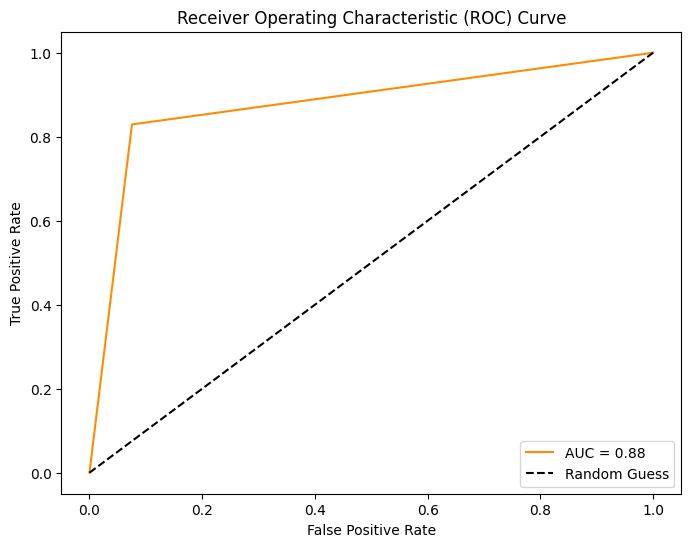

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for ROC
y_pred_prob = np.where(y_pred_bam > 0, 1, 0)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

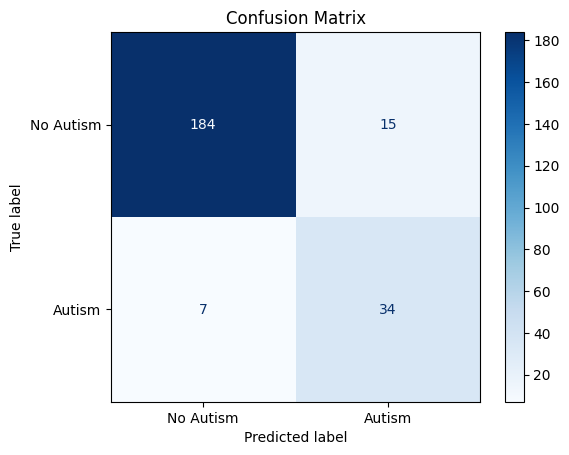

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Autism", "Autism"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()